# OpenCV

- 실시간 컴퓨터 비전을 목적으로, 실시간 이미지 프로세싱에 중점을 둔 한 프로그래밍 라이브러리

- 인텔(Intel)에서 개발

- TensorFlow , Torch / PyTorch 및 Caffe의 딥러닝 프레임워크 지원

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/440px-OpenCV_Logo_with_text.png" width="300">

  <sub>[이미지 출처] https://ko.wikipedia.org/wiki/OpenCV</sub>

- 코드 참조 : https://opencv-python.readthedocs.io/en/latest/index.html

# 이미지와 넘파이

- 이미지는 배열로 표현 가능 (Numpy)


## 이미지 읽기 1

- `pillow`, `matplotlib`와 `OpenCV` 모두 가능

- 구글 코랩(Colab), 쥬피터 노트북과 같은 환경에서는 pillow(PIL), matplotlib이 더 적합

- OpenCV는 주로 파이썬 스크립트 환경에서 사용
  - `from google.colab.patches import cv2_imshow`으로  
    이미지는 출력할 수는 있지만 동영상 관련 처리는 X

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO
from PIL import Image

In [5]:
cv2.__version__

'4.1.2'

- url과 Image객체를 활용하여 이미지 읽기
  - https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_960_720.jpg

In [9]:
url = 'https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_960_720.jpg'
response = requests.get(url=url)
data = BytesIO(response.content)
pic = Image.open(data)

## 이미지 출력 1

- 이미지 확인 (`pillow`)
  - Image 객체

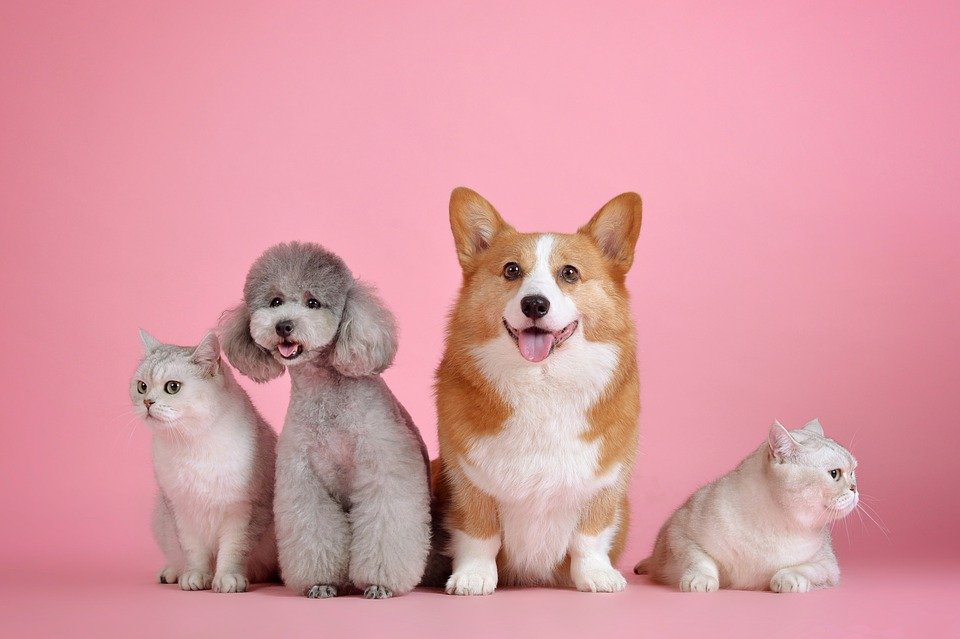

In [10]:
pic

- 타입(type) 확인

In [11]:
type(pic)

PIL.JpegImagePlugin.JpegImageFile

- PIL 이미지를 array형으로 형변환
  - `np.asarray()`

In [12]:
pic_array = np.asarray(pic)

- 타입(type) 확인

In [13]:
type(pic_array)

numpy.ndarray

- shape 확인

In [14]:
pic_array.shape     #(heigt, width, color)

(639, 960, 3)

## 이미지 출력 2
- R, G, B 에 따라 이미지 확인

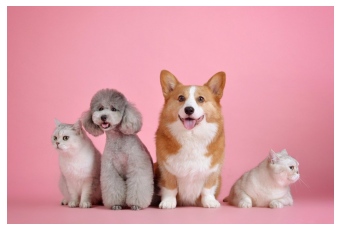

In [15]:
plt.imshow(pic_array); plt.axis('off'); plt.show()

In [20]:
pic_copy = pic_array.copy()

- 채널 순서 (R G B : 0 1 2)
  - `R channel`

In [21]:
pic_copy[:,:,0].shape

(639, 960)

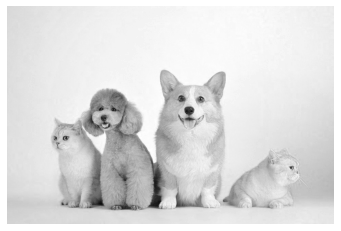

In [22]:
plt.imshow(pic_copy[:,:,0], cmap='gray')
plt.axis('off'); plt.show()

## 이미지 출력 3
- `OpenCV`

- Colab:  `from google.colab.patches import cv2_imshow`
- PC:     `cv2.imshow`

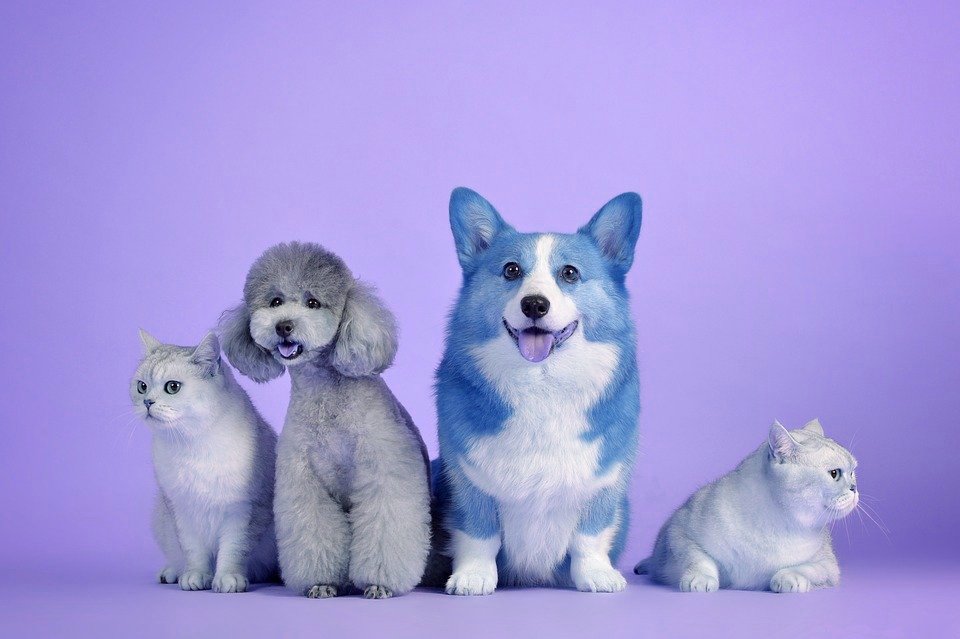

In [24]:
from google.colab.patches import cv2_imshow
cv2_imshow(pic_array)

## OpenCV 의 채널 순서
- OpenCV를 통해 영상(이미지)을 다룰 때의 채널 순서는 B G R
- matplotlib은 R G B 순서

- `cv2.cvtColor()`
  
  - image arrary, 변경할 색공간을 인자로 넣어줌 

  - 변경할 색공간은 여러 가지가 있음
    - `cv2.COLOR_BGR2RGB`

    - `cv2.COLOR_RGB2GRAY`

    - `cv2.COLOR_GRAY2RGB`

    - ...

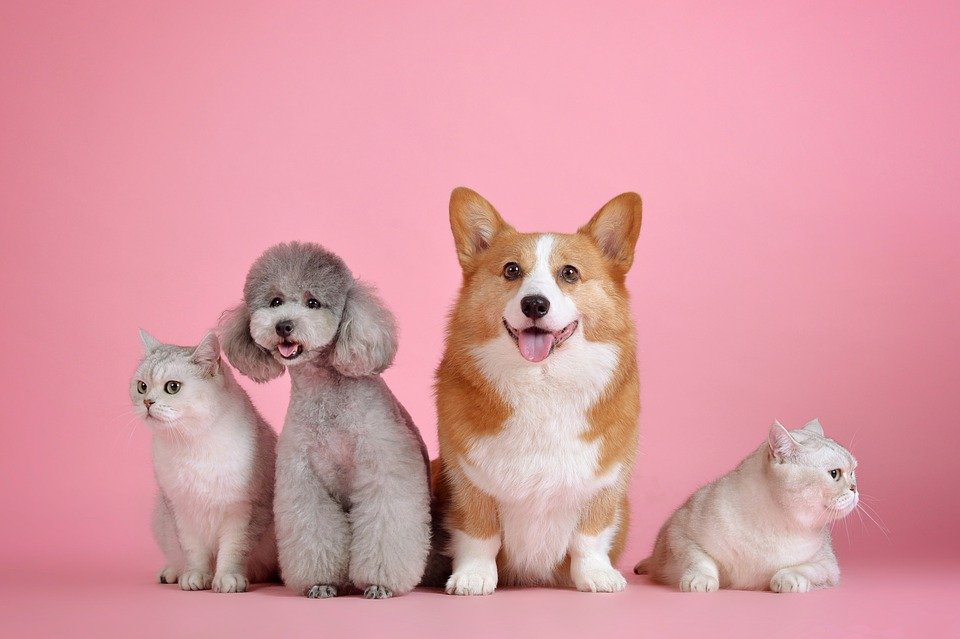

In [26]:
image = cv2.cvtColor(pic_array, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

- image, pic_arr 비교

  - 0 1 2 인덱스 중 0, 2가 바뀐 것을 알 수 있음

In [27]:
image[0,0], pic_array[0,0]

(array([141, 124, 215], dtype=uint8), array([215, 124, 141], dtype=uint8))

- (참고) array[ : ,  : ,  : : -1] 을 통해서도 인덱스 순서를 바꿀 수 있음

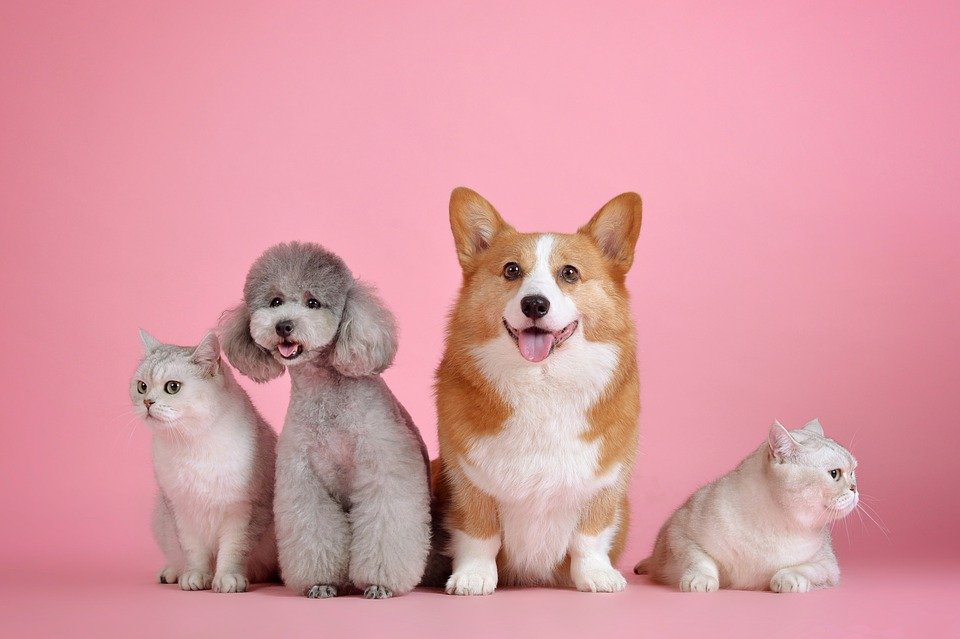

In [29]:
img = pic_array[:,:,::-1]
cv2_imshow(img)

## 이미지 읽기 2
- `cv2.imread()`

  - path, 이미지 파일의 flag값을 인자로 넣어줌

    - `cv2.IMREAD_COLOR`  
      이미지 파일을 Color로 읽어들이고, 투명한 부분은 무시되며, Default 값
    
    - `cv2.IMREAD_GRAYSCALE`  
      이미지를 Grayscale로 읽음. 실제 이미지 처리시 중간단계로 많이 사용
    
    - `cv2.IMREAD_UNCHANGED`  
      이미지 파일을 alpha channel (투명도)까지 포함하여 읽어 들임

- **(주의)**
  - `cv2.imread()`는 잘못된 경로로 읽어도 `NoneType`으로 들어갈 뿐, <u>오류를 발생하지 않음</u>

- 이미지 다운로드 후 colab에 업로드
  
  - https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/220px-Lenna.png
  
  <br>
  
  <img src="https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png" width="300">


In [30]:
from google.colab import files
up = files.upload()

Saving Lenna.png to Lenna.png


- `grayscale`로 읽기

## 이미지 저장
- `cv2.imwrite()`
  - 경로, 이미지 배열을 인자로 받음

- 이미지 저장을 하면 True반환

- 없는 이미지를 읽어도 type이 NoneType으로 들어갈 뿐 에러를 발생하지 않음

# 컬러 매핑(Color Mapping)

- 주로 그레이 스케일(Grayscale), 트루 컬러(True Color, RGB)이미지를 많이 활용

- 다양한 색 공간(ex, `HSV`, `YCrCB` 등)이 존재하고 이들을 변환할 수 있음
  
- 컬러 영상 처리에서 `HSV`와 `HSL`은 같은 색 공간을 이용하여 색상 구분에 용이하고, `YCrCb`와 `YUV`는 휘도 성분 구분에 용이

- `cv2.cvtColor()` 활용

## 색 공간의 종류 (참고)

- RGB
  - 컬러 표현을 빛의 3원색인 (Red, Green, Blue)으로 서로 다른 비율을 통해 색 표현

- CMYK
  - Cyan, Magenta, Yellow, Black를 기본으로 하여 주로 컬러 프린터나 인쇄시에 사용

  - 각 성분들의 감산에 의해 컬러 구현

- YUV

  - Y축은 밝기 성분을 U,V 두축을 이용하여 색상을 표현
  
  - U축은 파란색에서 밝기 성분을 뺀 값, V축은 빨간색에서 밝기 성분을 뺀 값
    
  - 아날로그 컬러신호 변환에 주로 사용.  (U = B - Y) , (V = R - Y)

- YCbCr
  
  - Digital TV에서 사용하는 색공간
  
  - YPbPr이라는 아날로그 신호의 색공간을 디지털화한 것
  
  - YPbPr은 아날로그 컴포넌트 비디오에서 사용


## RGB Color Space

- 빛의 삼원색 조합으로 색을 표현
  - `R`(빨간색), `G`(초록색), `B`(파란색)

- 디지털 컬러 영상을 획득할 때 사용

- 보편적으로 사용되고 있지만 '컬러 영상 처리'에서는 주로 사용되지 않음

  <br>
  
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/RGB_Cube_Show_lowgamma_cutout_b.png/600px-RGB_Cube_Show_lowgamma_cutout_b.png">

  <sub>[이미지 출처] https://en.wikipedia.org/wiki/RGB_color_space</sub>

- 이미지  

  - 이미지 사용 (다른 이미지 사용 가능)

  <img src="https://cdn.pixabay.com/photo/2017/09/25/13/12/dog-2785074_960_720.jpg" width="300">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EA%B0%95%EC%95%84%EC%A7%80-%EA%B0%9C-%EC%95%A0%EC%99%84-%EB%8F%99%EB%AC%BC-%EB%8F%99%EB%AC%BC-1903313/</sub>

- OpenCV와 matplotlib의 색공간 순서가 다르기 때문에 생기는 문제

  - `matploblib` : R G B

  - `OpenCV` : B G R

## HSV Color Space

- 색상(Hue), 채도(Saturation), 명도(Value)로 색을 표현

- 색상은 흔히 빨간색, 노란색 등과 같은 색의 종류

- 채도는 색의 순도  

  예들 들어, 파란색에서 
  
  - 채도가 높으면 맑고 선한 파란색

  - 채도가 낮으면 탁한 파란색

- 명도는 빛의 세기

  - 명도가 높으면 밝고, 낮으면 어둡게 느껴진다.

- OpenCV에서 `BGR2HSV` 색 공간 변환할 경우,  
  - `H` : 0 ~ 179 사이의 정수로 표현
    - 색상 값은 0° ~ 360° 로 표현하지만  
      uchar 자료형은 256이상의 정수를 표현할 수 없기 때문에 OpenCV에서는 각도를 2로 나눈 값을 H로 저장

  - `S` : 0 ~ 255 사이의 정수로 표현

  - `V` : 0 ~ 255 사이의 정수로 표현

  <br>

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/HSV_cone.jpg/400px-HSV_cone.jpg">

  <sub>[이미지 출처] https://ko.wikipedia.org/wiki/HSV_%EC%83%89_%EA%B3%B5%EA%B0%84</sub>

## HSL Color Space

- 색상(Hue), 채도(Saturation), 밝기(Lightness)로 색을 표현하는 방식

- HSV와 동일하지만 **밝기** 요소의 차이

- HSV와 더불어 사람이 실제로 color를 인지하는 방식과 유사

  <br>

  <img src="https://rgbtohex.page/imgs/hsl-cylinder.png">

  <sub>[이미지 출처] https://rgbtohex.page/hsl</sub>

## YCrCb Color Space

- Y 성분은 밝기 또는 휘도(luminance), Cr, Cb 성분은 색상 또는 색차(chrominance)를 나타냄

- Cr, Cb는 오직 색상 정보만 가지고 있음. 밝기 정보 X

- 영상을 GrayScale 정보와 색상 정보로 분리하여 처리할 때 유용

- `Y`, `Cr`, `Cb`  : 0 ~ 255 사이의 정수로 표현

  <br>

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/YCbCr-CbCr_Scaled_Y50.png/600px-YCbCr-CbCr_Scaled_Y50.png" width="300">
  <img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/YCbCr.GIF">

  <sub>[이미지 출처] https://en.wikipedia.org/wiki/YCbCr</sub>

## GrayScale Color Space

- 영상의 밝기 정보를 256단계 (0 ~ 255) 로 구분하여 표현

- 가장 밝은 흰색 : 255  
  가장 어두운 검은색 : 0

  <img src="https://miro.medium.com/max/1400/1*euc4RxnNo78LFEGrb-QZ7w.jpeg">

  <sub>[이미지 출처] https://medium.com/@himnickson/converting-rgb-image-to-the-grayscale-image-in-java-9e1edc5bd6e7</sub>